In [348]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageDraw as imd

im = cv.imread(r'C:\Users\user\Downloads\wood.png')

In [102]:
def is_int (num):
    if (abs(num)%2==0 or (abs(num)+1)%2==0):
        return True
    else :
        return False

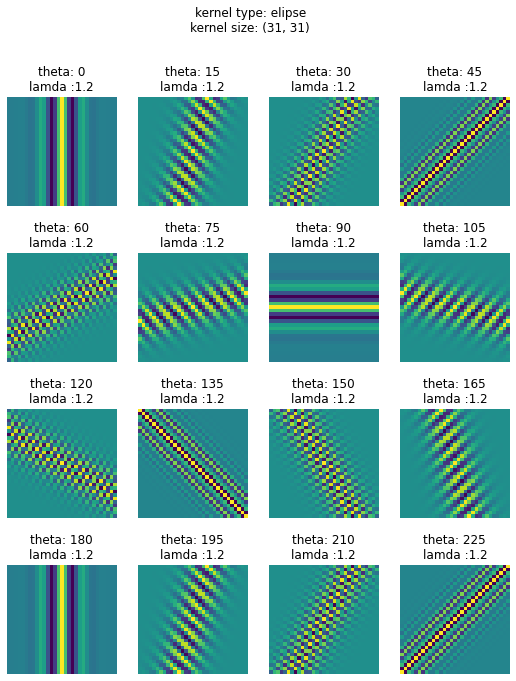

In [298]:
def kernel_builder(k=11,gamma=1,lamda='var'):
    
    if k%2==0:
        k=k+1
    if is_int(gamma):
        kernel_type ='circle'
    else:
        kernel_type= 'elipse'
    
    #thetas =np.full(16,np.pi)
    thetas=np.arange(0, 5*np.pi/4, np.pi/12)
    
    if lamda=='var':
        lamdas = np.linspace(np.pi/2, np.pi+2, 16)    
    else :
        lamdas = np.full(16,lamda)
    
    f,ax =plt.subplots(4,4, figsize=(9,11))
    
    kernels =[]
      
    for lam,theta,axs in zip(lamdas,thetas, ax.flatten()):
        kern = cv.getGaborKernel((k,k), sigma=4.0, theta=theta, lambd=lam,psi=0,gamma=gamma, ktype=cv.CV_32F)
        kernels.append(kern)
               
        axs.imshow(kern)
        axs.set_title('theta: {:.0f}\nlamda :{:.1f}'.format(theta*180/np.pi,lam))
        axs.axis('off')

    f.suptitle('kernel type: {}\nkernel size: {}'.format(kernel_type,(k,k)))
    f.set_tight_layout(False)
    #f.savefig(fname =r'C:\Users\user\Documents\kernels_{}_{}_lamda_{}.png'.format(k,kernel_type,lamda),format= 'png')
    return f,kernels,kernel_type,thetas,lamdas,lamda,gamma

sheet, kernels,k_type,thetas,lamdas,l_type,gamma = kernel_builder(k=31,gamma=0.01,lamda=1.2)

In [660]:
img = apply_Gabor(im,k=3,theta=135,lamda=2.9,gama=0.01)
img.save(r'C:\Users\user\Documents\combine_filtered_kernel_3.png',format='png')

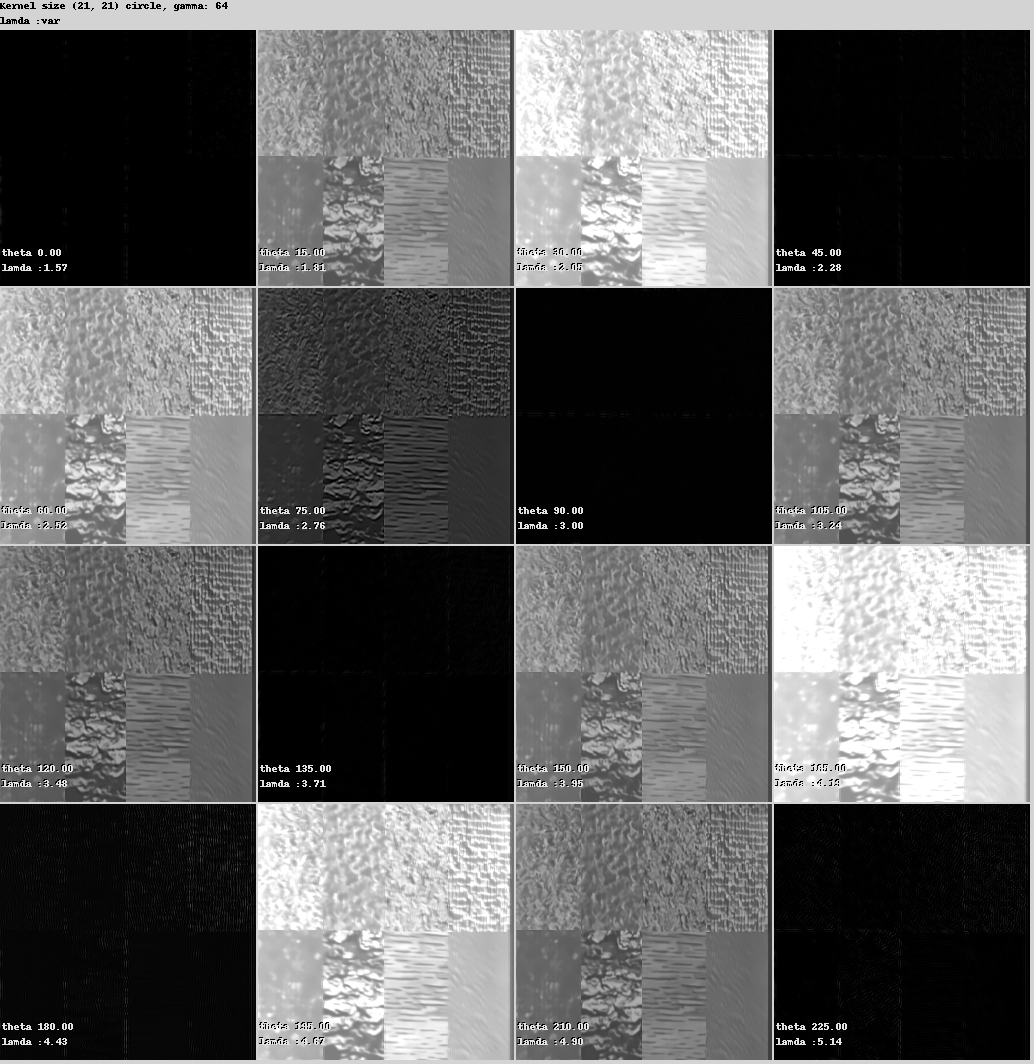

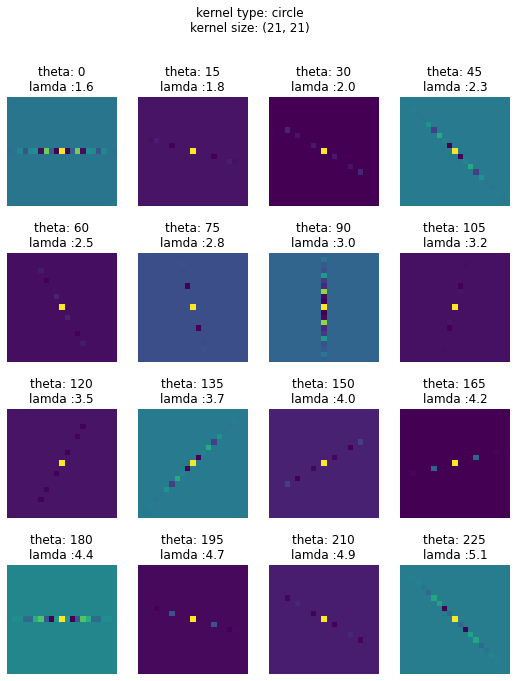

In [336]:
def compare_kernels(im,kernels,k_type,thetas,lamdas,l_type,gamma):
    
    from PIL import ImageDraw as imd
    from PIL import Image
    gray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
    dst = cv.fastNlMeansDenoising(gray,None,10,7,21)
    filtered_im = []
    canvas = Image.new('L', (256*4+10,256*4+40),'lightgray')
    x,y =0,30
    k=kernels[0].shape[0]
    imd.Draw(canvas).text((0,0),'Kernel size {} {}, gamma: {} \nlamda :{}'.format((k,k),k_type,gamma,l_type), 
                            fill='black', stroke_width=0,stroke_fill='black')
    
    for kernel,teta,lamda in zip(kernels,thetas,lamdas):
        fimg = cv.filter2D(dst, cv.CV_8UC3, kernel)
        filtered_im.append(fimg)
        fimg = Image.fromarray(fimg).reduce(2)
        imd.Draw(fimg).text((1,fimg.height-40),'theta {:.2f}\nlamda :{:.2f}'.format(teta*180/np.pi,lamda), 
                            fill='yellow', stroke_width=1,stroke_fill='black')
        canvas.paste(fimg,(x,y))
        if (x+fimg.width)>1024:
            x = 0
            y = y + fimg.height + 2
            
        else: x = x + fimg.width + 2
        
        canvas.save(r'C:\Users\user\Documents\combine_{}_{}_lamda_{}_gama_{}.png'.format(k_type,k,l_type,gamma),format='png')
    return canvas, filtered_im

sheet, kernels,k_type,thetas,lamdas,l_type,gamma = kernel_builder(k=21,gamma=64)
cvas,filts = compare_kernels(im,kernels,k_type,thetas,lamdas,l_type,gamma)
cvas


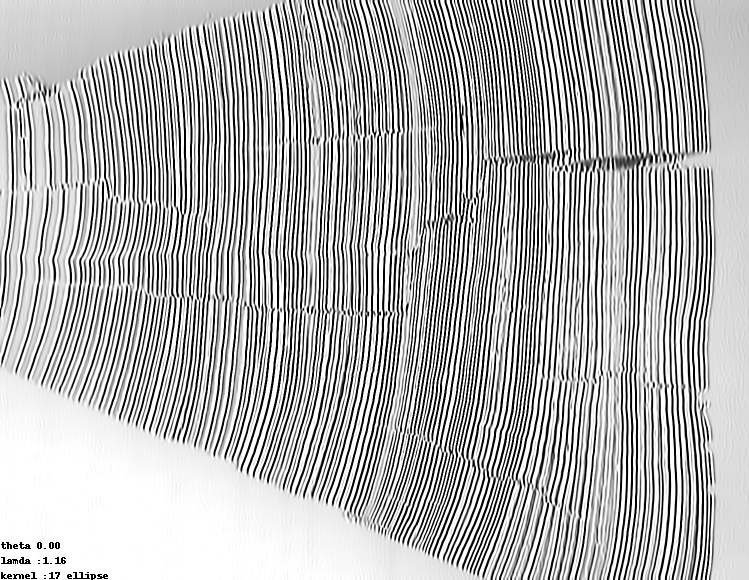

In [379]:
def apply_Gabor(im,k=7,theta=0,lamda=0,gamma=1):
    
    from PIL import ImageDraw as imd
    from PIL import Image
    
    
    theta=theta*np.pi/180
    
    kern = cv.getGaborKernel((k,k), sigma=4.0, theta=theta, lambd=lamda,psi=0,gamma=gamma, ktype=cv.CV_32F)
    gray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
    dst = cv.fastNlMeansDenoising(gray,None,10,7,21)
    fimg = cv.filter2D(dst, cv.CV_8UC3, kern)
    fimg = Image.fromarray(fimg).reduce(2)
    imd.Draw(fimg).text((1,fimg.height-40),'theta {:.2f}\nlamda :{:.2f}\nkernel :{} ellipse'.format(theta*180/np.pi,lamda,k),
                        fill='black', stroke_width=0,stroke_fill='gray')
    #fimg.save(r'C:\Users\user\Documents\combined_filtered.png',format='png')
    return fimg
apply_Gabor(im,k=17,theta=0,lamda=1.16,gamma=1)

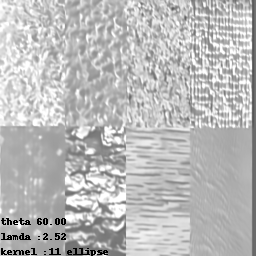

In [347]:
apply_Gabor(im,k=11,theta=60,lamda=2.52,gama=36)

### Inferences based on evaluation of woodrings

#### Kernel size
As size of kernel increases the band filters restrict more features from the image to pass through it. For lower values of kernel the filters are lenient to image features. This behaves analogous to the pore size in filters with higher values indicating smaller pore size.

#### Lamda
Increasing the value of wavelength parameter lamda smoothens the pixel values further away from the pixel

#### Gamma
Using eliptical kernel (gamma in fractions of integers) produces images with better contrast compared to circular orbits(integer values for gamma
Gamma and kernel size seem to be positively correlated moving together in pairs in either direction. However at higher values of gamma for a given kernel size, the filter appears to normalize the brightness levels across all possible angles. At higher gamma, kernel angles with strongly filtereing values allow more pixels to pass through it and kernel angles which had earlier higher brightness are less bright. 


